In [30]:
import pandas as pd

df=pd.read_csv('./Internet_Usage_Each_Year.csv')
df_updated=df.melt(id_vars=['Country Name'], var_name='Year', value_name='Population')
binary=df_updated['Year'].str.fullmatch(r'\d{4}')
df_updated=df_updated[binary].dropna()
df_updated['Year']=df_updated['Year'].astype(int)

x=df_updated['Year'].tolist()
y=df_updated['Population'].tolist()

print(x)
print(y)

[1990, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]
[0, 0.000111, 0.000218, 0.00107, 0.0262, 0.0463, 0.0708, 0.139, 0.273, 0.528, 0.66, 1.54, 1.69, 1.98, 2.39, 2.81, 3.95, 4.38, 5.12, 7.5, 10.1, 11.1, 12.3, 13.5, 14.9, 16.5, 18.2, 20.1, 29.5, 43.4, 55.9]


In [31]:
import numpy as np
x=np.array(x)
y=np.array(y)
x=(x-np.mean(x))/np.std(x)


In [32]:
theta_0=0.0
theta_1=0.0
alpha=0.01
n=len(x)

In [33]:
def Stochastic_gradient_descent(x,y,theta_0,theta_1,learning_rate,n):
    for j in range(n):
        error=(theta_0+(theta_1*x[j])-y[j])
        theta_0-=learning_rate*error
        theta_1-=learning_rate*error*x[j]
    return theta_0, theta_1

In [34]:
for epochs in range(500):
    theta_0,theta_1=Stochastic_gradient_descent(x,y,theta_0,theta_1,alpha,n)
    print(theta_0, theta_1)

2.558306463907584 2.9711742894975863
4.400130231324937 5.165966645662899
5.725657587901191 6.786842242862537
6.67926514003318 7.983580501719851
7.365047030531943 8.866953510545532
7.858030526498688 9.518862021401471
8.21227507026412 9.999843971164651
8.46671919853382 10.354634852463832
8.649400402187089 10.616284119648933
8.780499822007906 10.809201688986192
8.874538396326598 10.951411950181747
8.941960468648299 11.056220960389421
8.990275347127174 11.13344924886005
9.024879946256597 11.190343163143048
9.049651412211322 11.232248398037772
9.06737390177379 11.263107635885024
9.080045820136503 11.285828136579434
9.089100921912587 11.302553195898193
9.095567365798594 11.314862563276272
9.10018209102644 11.32392037481745
9.103473033301816 11.330584320414589
9.105818199151804 11.335486185028516
9.107488094589783 11.33909125697447
9.108676185189118 11.341742138523712
9.109520753907297 11.343691046970138
9.110120578705391 11.3451236247546
9.11054617194174 11.34617648696471
9.110847833916702 1

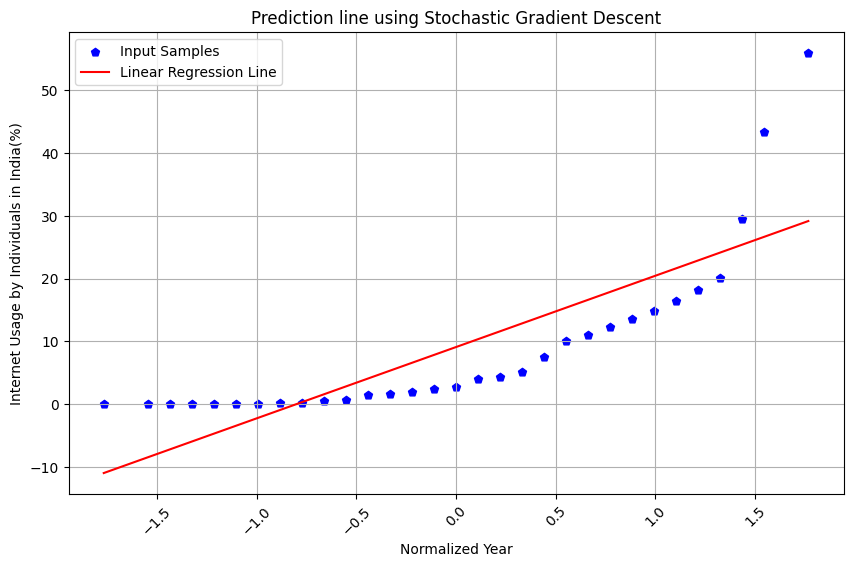

In [36]:
import matplotlib.pyplot as plt

y_pred=theta_0+theta_1*x

plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue',marker='p',label="Input Samples")
plt.plot(x,y_pred, color='red', label="Linear Regression Line")
plt.title("Prediction line using Stochastic Gradient Descent")
plt.xlabel("Normalized Year")
plt.ylabel("Internet Usage by Individuals in India(%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Prediction Code
x_original=np.array(df_updated['Year'].tolist())
x_mean=np.mean(x_original)
x_std=np.std(x_original)

input=2000
predicted_value=theta_0+theta_1*(input-x_mean)/x_std
print(f"Predicted Internet Usage in {input}: {predicted_value:.2f}%")

Predicted Internet Usage in 2000: 1.59%
